ASSIGNMENT 3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
ls

drive/  sample_data/


In [ ]:
cd/content/drive/MyDrive/Colab Notebooks


/content/drive/MyDrive/Colab Notebooks


In [ ]:
ls

 Asignment2.ipynb         'Chatbot_AI_Excercise_10[1].ipynb'
 Assignment_1.ipynb       'Copy of Welcome To Colaboratory'
'Assignment 3 (1).ipynb'   Flowers-Dataset.zip
'Assignment 3.ipynb'      'semantic-search-engine-using-nlp_(1)[1].ipynb'


In [ ]:
pwd

'/content/drive/MyDrive/Colab Notebooks'

In [ ]:
!unzip Flowers-Dataset.zip

Archive:  Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg  
  infla

**Image Augmentation**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True, vertical_flip=False)

In [ ]:
 test_datagen= ImageDataGenerator(rescale=1./255)

In [ ]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/Colab Notebooks/flowers/",target_size=(64,64),class_mode='categorical',batch_size=75)


Found 4317 images belonging to 5 classes.


In [ ]:
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/Colab Notebooks/flowers/",target_size=(64,64),class_mode='categorical',batch_size=75)


Found 4317 images belonging to 5 classes.


In [ ]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

**Create Model**

In [ ]:
from tensorflow.keras.models import Sequential

**Add Layers**

In [ ]:
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten

In [ ]:
model = Sequential()

In [ ]:
model.add(Convolution2D(32, (3,3), input_shape=(64,64,3),activation = 'relu')) #Feature map

In [ ]:
model.add(MaxPooling2D(pool_size = (2,2))) #Pooled matrix

In [ ]:
model.add(Flatten())

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [ ]:
model.add(Dense(5,activation='softmax'))

**Compile the Model**

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
len(x_train)

58

In [ ]:
len(x_test)

58

**Fit the Model**

In [ ]:
model.fit_generator(x_train, steps_per_epoch=len(x_train), validation_data=x_test, validation_steps=len(x_test),epochs=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
58/58 [==============================] - 59s 998ms/step - loss: 1.7758 - accuracy: 0.3542 - val_loss: 1.1966 - val_accuracy: 0.4763
Epoch 2/10
58/58 [==============================] - 58s 996ms/step - loss: 1.1284 - accuracy: 0.5319 - val_loss: 1.0676 - val_accuracy: 0.5870
Epoch 3/10
58/58 [==============================] - 57s 992ms/step - loss: 1.0299 - accuracy: 0.5923 - val_loss: 1.0598 - val_accuracy: 0.5942
Epoch 4/10
58/58 [==============================] - 57s 977ms/step - loss: 0.9540 - accuracy: 0.6296 - val_loss: 0.9639 - val_accuracy: 0.6372
Epoch 5/10
58/58 [==============================] - 56s 975ms/step - loss: 0.8870 - accuracy: 0.6583 - val_loss: 0.8311 - val_accuracy: 0.6838
Epoch 6/10
58/58 [==============================] - 56s 966ms/step - loss: 0.8542 - accuracy: 0.6715 - val_loss: 0.8355 - val_accuracy: 0.6831
Epoch 7/10
58/58 [==============================] - 57s 991ms/step - loss: 0.8096 - accuracy: 0.6884 - val_loss: 0.7645 - val_accuracy: 0.7137

**Save the model**

In [ ]:
model.save('flowers.h5')

In [ ]:
ls

 Asignment2.ipynb
 Assignment_1.ipynb
'Assignment 3 (1).ipynb'
'Assignment 3.ipynb'
'Chatbot_AI_Excercise_10[1].ipynb'
'Copy of Welcome To Colaboratory'
 flowers/
 Flowers-Dataset.zip
 flowers.h5
'semantic-search-engine-using-nlp_(1)[1].ipynb'


**Test the model**

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('flowers.h5')

In [ ]:
pwd

'/content/drive/MyDrive/Colab Notebooks'

In [ ]:
img=image.load_img(r'/content/drive/MyDrive/Colab Notebooks/flowers/daisy/8446495985_f72d851482.jpg')

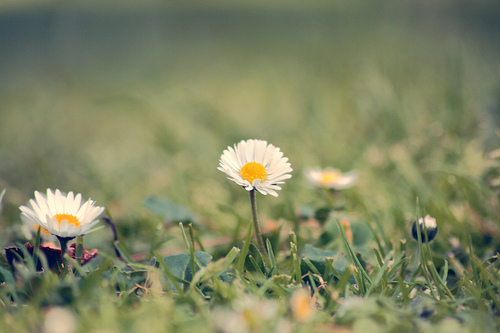

In [ ]:
img

In [ ]:
img=image.load_img(r'/content/drive/MyDrive/Colab Notebooks/flowers/daisy/8446495985_f72d851482.jpg',target_size=(64,64))

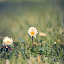

In [ ]:
img

In [ ]:
x=image.img_to_array(img)

In [ ]:
x

array([[[119., 123., 100.],
        [117., 122.,  99.],
        [116., 119.,  98.],
        ...,
        [ 85.,  85.,  85.],
        [ 74.,  85.,  79.],
        [ 67.,  82.,  79.]],

       [[100., 106.,  92.],
        [100., 108.,  95.],
        [ 99., 105.,  95.],
        ...,
        [ 73.,  86.,  79.],
        [ 70.,  80.,  81.],
        [ 63.,  79.,  78.]],

       [[ 77.,  92.,  87.],
        [ 76.,  91.,  88.],
        [ 75.,  91.,  88.],
        ...,
        [ 65.,  79.,  79.],
        [ 63.,  77.,  77.],
        [ 59.,  75.,  75.]],

       ...,

       [[129., 133.,  83.],
        [154., 144.,  95.],
        [126., 130.,  80.],
        ...,
        [109., 119.,  85.],
        [ 98., 109.,  95.],
        [ 89.,  98.,  69.]],

       [[127., 132.,  78.],
        [143., 141.,  93.],
        [145., 145.,  83.],
        ...,
        [108., 124.,  85.],
        [ 98., 109.,  95.],
        [ 86., 103.,  84.]],

       [[133., 135.,  85.],
        [134., 130.,  83.],
        [143., 1

In [ ]:
x.shape

(64, 64, 3)

In [ ]:
x= np.expand_dims(x,axis=0)

In [ ]:
x

array([[[[119., 123., 100.],
         [117., 122.,  99.],
         [116., 119.,  98.],
         ...,
         [ 85.,  85.,  85.],
         [ 74.,  85.,  79.],
         [ 67.,  82.,  79.]],

        [[100., 106.,  92.],
         [100., 108.,  95.],
         [ 99., 105.,  95.],
         ...,
         [ 73.,  86.,  79.],
         [ 70.,  80.,  81.],
         [ 63.,  79.,  78.]],

        [[ 77.,  92.,  87.],
         [ 76.,  91.,  88.],
         [ 75.,  91.,  88.],
         ...,
         [ 65.,  79.,  79.],
         [ 63.,  77.,  77.],
         [ 59.,  75.,  75.]],

        ...,

        [[129., 133.,  83.],
         [154., 144.,  95.],
         [126., 130.,  80.],
         ...,
         [109., 119.,  85.],
         [ 98., 109.,  95.],
         [ 89.,  98.,  69.]],

        [[127., 132.,  78.],
         [143., 141.,  93.],
         [145., 145.,  83.],
         ...,
         [108., 124.,  85.],
         [ 98., 109.,  95.],
         [ 86., 103.,  84.]],

        [[133., 135.,  85.],
       

In [ ]:
x.shape

(1, 64, 64, 3)

In [ ]:
y= np.argmax(model.predict(x),axis=1)

In [ ]:
y

array([0])

In [ ]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
index=['daisy','dandelion','rose','sunflower','tulip']


In [ ]:
index[y[0]]

'daisy'

In [ ]:
img=image.load_img(r'/content/drive/MyDrive/Colab Notebooks/flowers/rose/8063462557_e0a8bd6c64_n.jpg',target_size=(64,64))

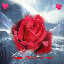

In [ ]:
img

In [ ]:
x=image.img_to_array(img)

In [ ]:
x=np.expand_dims(x,axis=0)

In [ ]:
y=np.argmax(model.predict(x),axis=1)

In [ ]:
y

array([2])

In [ ]:
index=['daisy','dandelion','rose','sunflower','tulip']


In [ ]:
index[y[0]]

'rose'